# Variational monte carlo simulation for 1D harmonic oscillator.

The local energy equals:  0.508335684791 
With uncertainty:  0.0168132451041


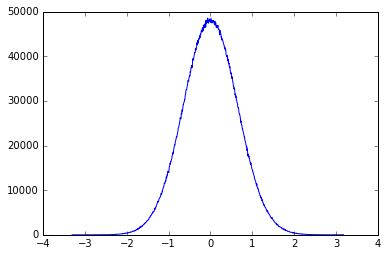

In [57]:
import numpy as np
from matplotlib import pyplot as plt
import math
%matplotlib inline
#Harmonic oscillator local energy
def ElHarm(x, a):
    return a + x * x * (0.5 - 2 * a ** 2)

def init(nWalk = 10, nStep = 10000, nEquilibriate = 1000):
    
    r = np.zeros(nWalk * nStep - nEquilibriate * nWalk)
    #w = np.random.normal(0,math.sqrt(1 / 2 / a), nWalk) #initiate walkers in normal distr
    w = np.random.uniform(-math.sqrt(1 / 2 / a), math.sqrt(1 / 2 / a)) #initiate walkers in uniform distribution
    return nWalk, nStep, r, w

def move(x, a):
    return x + np.random.normal(0,math.sqrt(1 / 2 / a), 1)

def accept(w, wNew, a):
    ratio = math.exp(-a * (wNew ** 2 - w ** 2)) ** 2 
    if(ratio > 1):
        return True
    else:
        return np.random.uniform() < ratio 

def updateWalkers(w, nWalk, a):
    for i in range(0, nWalk):
        wNew = move(w[i], a)
        if(accept(w[i], wNew, a)):
            w[i] = wNew
            
def updateWalkersVec(w, nWalk, a):
    wNew = np.random.normal(0,math.sqrt(1 / 2 / a), nWalk)
    ratio = np.exp(-2 * a * ((w+wNew) ** 2 - w ** 2)) 
    u = np.random.uniform(size=(nWalk))
    w += (u < ratio) * wNew
            
nWalk = 400
nStep = 30000
a = 0.6
nEquilibriate = 4000

r = np.zeros(nWalk * nStep)
w = np.random.normal(0,math.sqrt(1 / 2 / a), nWalk) #initiate walkers in normal distr
    
for i in range(0, nEquilibriate):
    updateWalkersVec(w, nWalk, a)
    
for i in range(0, nStep):
    updateWalkersVec(w, nWalk, a)
    r[i * nWalk : (i + 1) * nWalk] = w
    
hist, bin_edges = np.histogram(r,1000)
        
        
        
plt.plot(np.linspace(min(bin_edges),max(bin_edges), len(hist)), hist)


print("The local energy equals: ", np.mean(ElHarm(r, a)), "\nWith uncertainty: ", np.var(ElHarm(r, a)))

10

In [7]:
len(r)

90000

In [8]:
len(r[10:20])

10

In [9]:
r[10:20] = w

In [10]:
i *nWalk

90000